In [1]:
include("ErgodicControl.jl")
using .ErgodicControl

In [2]:
PointsBoundary([])

PointsBoundary(Tuple{Float64, Float64}[])

In [3]:
em = ErgodicManagerR2("single gaussian", K=5, bins=100)

# x0 = [0.4,0.1]
x0 = [0.2,0.2]
N = 40
h = 0.1

0.1

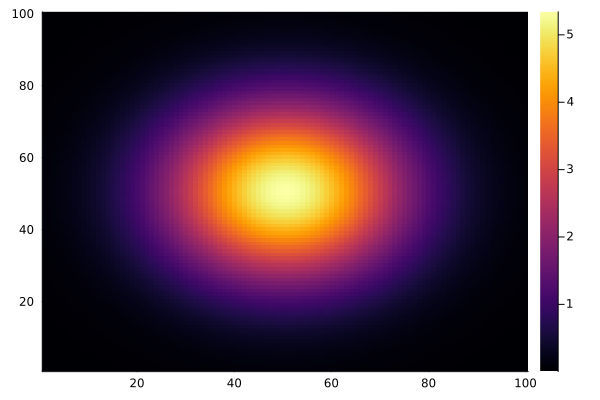

In [4]:
using Plots
heatmap(em.phi)

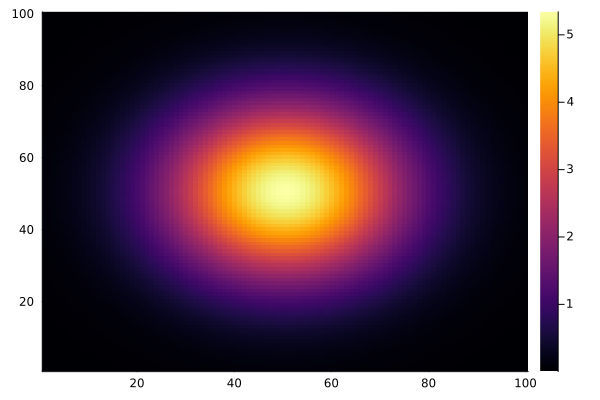

In [5]:
# phi = zeros(size(em.phi))
# phi[60:65,60:65] .= 50.0

x0 = [0.44,0.33]


points = [(x0[1] - 0.3, x0[2] - 0.3), (x0[1] - 0.3, x0[2]), (x0[1], x0[2]), (x0[1], x0[2]-0.3), (x0[1] - 0.3, x0[2] - 0.3)]
points = interpolate_points(points, 10)
xy_points_boundary = PointsBoundary(points)
em = ErgodicManagerR2(em.domain, em.phi, 25, xy_points_boundary)

heatmap(em.phi)

In [24]:
N = 20
x0 = [0.44,0.33]
# tm = TrajectoryManager(x0, h, N, ConstantInitializer([0.0,0.0]))
tm = TrajectoryManager(x0, h, N, BoundaryInitializer())
tm.barrier_cost = 1000.

xd, ud, es = pto_trajectory(em, tm, return_score=true, max_iters=1)

--------------------------------------------------------------------------
 iter  |ergodic score |control score |total score |direc deriv |step size
--------------------------------------------------------------------------


 1       1.1240005      0.0039291      1.1279296    -15163726.3984052 0.00122
max iterations reached...
--------------------------------------------------------------------------
 iter  |ergodic score |control score |total score |direc deriv |step size
--------------------------------------------------------------------------
 1       1.1240005      0.0039291      1.1279296    -15163726.3984052 0.00122


([[0.14, 0.33], [0.11876867436010298, 0.3860053469168059], [0.09803171906284555, 0.4418640729513792], [0.07827196563744354, 0.49742752348263586], [0.05913613931859642, 0.5525441061880761], [0.040276925786790235, 0.6070579853833917], [0.021349618048095223, 0.6608073552083679], [0.0020087096590101217, 0.7136227415645148], [-0.018095494964461934, 0.7653252390722878], [-0.03932029607405063, 0.8157246767197225]  …  [-0.08661981003727652, 0.9122384537094808], [-0.11347951633293836, 0.9592190663730642], [-0.14303801697166296, 1.0061853292418348], [-0.17574712200253223, 1.053763049924888], [-0.21209005808734332, 1.1025842108441448], [-0.25258624086039916, 1.1532932039193007], [-0.297796394501324, 1.20655310452385], [-0.34832814703464365, 1.2630524098431717], [-0.4048426822011372, 1.3235122776194603], [-0.4680611364413056, 1.388693529097921]], [[-0.21231325639897036, 0.5600534691680586], [-0.2073695529725742, 0.558587260345733], [-0.19759753425402016, 0.5556345053125666], [-0.19135826318847127,

In [25]:
es

1.1240004817863631

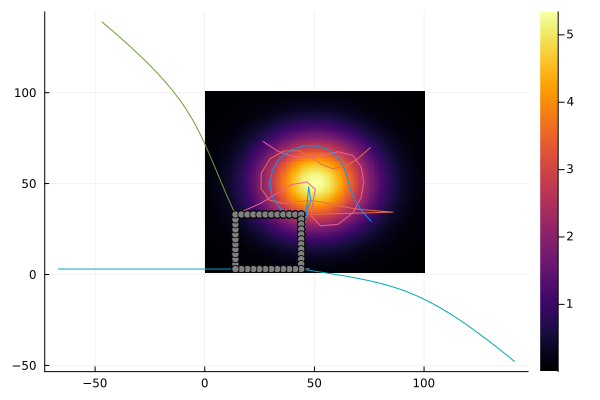

In [26]:
plot!([xd[i][1]*100 for i =1:length(xd)], [xd[i][2]*100 for i =1:length(xd)])
plot!([xd[1][1]*100], [xd[1][2]*100], color=:green)
scatter!([xd[1][1]*100], [xd[1][2]*100])
plot!([xy_points_boundary.points[i][1]*100 for i = 1:length(xy_points_boundary.points)], [xy_points_boundary.points[i][2]*100 for i = 1:length(xy_points_boundary.points)], linewidth=2)
scatter!([xy_points_boundary.points[i][1]*100 for i = 1:length(xy_points_boundary.points)], [xy_points_boundary.points[i][2]*100 for i = 1:length(xy_points_boundary.points)], linewidth=2, color=:gray, legend=false)



In [72]:
em = ErgodicManagerR2(em.domain, phi, 5)
xd_smc, ud_smc = smc_trajectory(em, tm; verbose=true, umax=1.0)

([[0.53, 0.5], [0.43000000000000005, 0.5000000000000001], [0.33000000000000007, 0.5000000000000002], [0.23000000000000007, 0.5000000000000002], [0.13000000000000006, 0.5000000000000002], [0.030000000000000054, 0.5000000000000001], [0.13000000000000006, 0.4999999999999994], [0.23000000000000007, 0.49999999999999784], [0.33000000000000007, 0.4999999999999951], [0.43000000000000005, 0.4999999999999913]  …  [2.5252771739045956, 0.7358213295319177], [2.564184005536913, 0.8279422199549618], [2.6128989524210215, 0.9152740809798963], [2.7015159945449625, 0.9616100264780049], [2.8014458273761087, 0.957864561174583], [2.898587247840667, 0.9341254704142388], [2.9631841066750524, 0.8577890713065359], [2.9542775045634433, 0.7581864988556927], [2.910004814605242, 0.668520848108793], [2.8406804971716126, 0.5964504726944704]], [[-1.0, 7.435098295962948e-16], [-1.0, 1.4235539011556096e-15], [-1.0, 4.636608127621785e-16], [-1.0, -4.220624201228706e-16], [-1.0, -1.581710038384762e-15], [1.0, -7.299936268

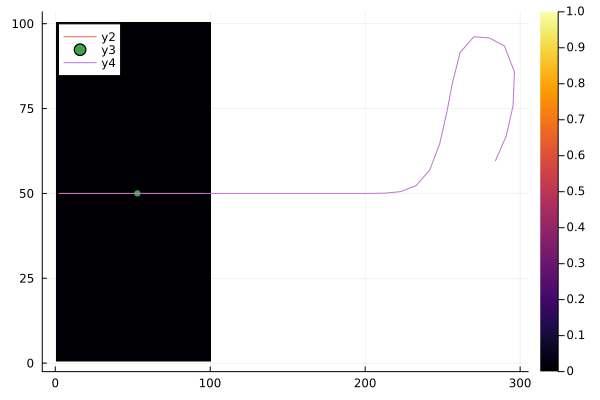

In [73]:
plot!([xd_smc[i][1]*100 for i =1:length(xd)], [xd_smc[i][2]*100 for i =1:length(xd)])


In [109]:
using LinearAlgebra

function outward_normal(points, query_point)
    # Ensure the points form a closed loop
    if !(query_point in points)
        closest_point = points[argmin([norm(points[i] - query_point) for i = 1:length(points)])]
    else
        closest_point = query_point
    end

    query_idx = findall(x-> x==closest_point, points)[1]
    if query_idx == 1
        next_point = points[2]
        prev_point = points[end]
    elseif query_idx == length(points)
        next_point = points[1]
        prev_point = points[end-1]
    else
        next_point = points[query_idx+1]
        prev_point = points[query_idx-1]
    end

    # Compute the vectors from the query point to the adjacent points
    vector_from_prev = abs.(closest_point - prev_point)
    vector_from_next = abs.(closest_point - next_point)

    # Compute the outward normal by averaging the vectors and rotating by 90 degrees
    outward_normal = (vector_from_prev + vector_from_next) / 2

    # Normalize the outward normal
    outward_normal /= norm(outward_normal)

    xmin = minimum([p[1] for p in points])
    xmax = maximum([p[1] for p in points])
    ymin = minimum([p[2] for p in points])
    ymax = maximum([p[2] for p in points])

    x_sign = 1
    if query_point[1] == xmin
        x_sign = -1
    end

    y_sign = 1
    if query_point[2] == ymin
        y_sign = -1
    end

    return [x_sign*outward_normal[2], y_sign*outward_normal[1]]
end


outward_normal (generic function with 1 method)

In [110]:
points

45-element Vector{Vector{Float64}}:
 [0.0, 0.4545454545454546]
 [0.0, 0.36363636363636365]
 [0.0, 0.2727272727272727]
 [0.0, 0.18181818181818182]
 [0.0, 0.09090909090909091]
 [0.0, 0.0]
 [0.0, 0.0]
 [0.09090909090909083, 0.0]
 [0.18181818181818177, 0.0]
 [0.2727272727272727, 0.0]
 ⋮
 [0.2727272727272727, 1.0]
 [0.18181818181818182, 1.0]
 [0.09090909090909091, 1.0]
 [0.0, 1.0]
 [0.0, 0.9090909090909092]
 [0.0, 0.8181818181818182]
 [0.0, 0.7272727272727273]
 [0.0, 0.6363636363636364]
 [0.0, 0.5454545454545454]

In [115]:
function sort_points(points::Vector{Tuple{Float64, Float64}})
    # Compute the centroid of the points
    cx, cy = sum([p[1] for p in points]) / length(points), sum([p[2] for p in points]) / length(points)
    # Define a function to compute the angle between two points and the x-axis
    angle(x::Tuple{Float64, Float64}) = atan(x[2] - cy, x[1] - cx)
    # Sort the points by angle with respect to the centroid
    sorted_points = sort(points, by=angle)

    return sorted_points
end

sort_points (generic function with 1 method)

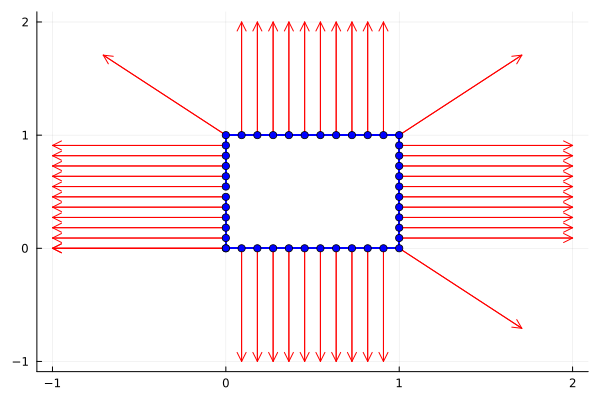

In [118]:
using Plots

# Define the points of the square
points = [(0.,0.), (0.,1.), (1.,1.), (1.,0.)]
push!(points, points[1])
points = interpolate_points(points, 10)
points = sort_points(points)

points = [[points[i][1], points[i][2]] for i = 1:length(points)]

# Ensure the points form a closed loop

# Define the query point
# query_point = [0, 0.25]
plot()
for query_point in points
    # query_point = [1., 0.]

    # Call the function
    normal = outward_normal(points, query_point)

    # Start a new plot
    # plot()

    # Plot the polygon
    for i in 1:length(points)-1
        plot!([points[i][1], points[i+1][1]], [points[i][2], points[i+1][2]], color=:blue, label = false)
    end

    # Plot the normal
    quiver!([query_point[1]], [query_point[2]], quiver = ([normal[1]], [normal[2]]), color=:red, label = false)

    # Show the plot
    # display(plot!())
end
scatter!([points[i][1] for i = 1:length(points)], [points[i][2] for i = 1:length(points)], color=:blue, label = false)


In [114]:
normal = outward_normal(points, [0.,0.])

2-element Vector{Float64}:
 -1.0
 -0.0

In [63]:
normal

2-element Vector{Float64}:
 NaN
 NaN

In [23]:
i = 4
prev_point = points[i-1]
next_point = points[(i%length(points))+1]

2-element Vector{Int64}:
 0
 0

In [24]:
prev_point

2-element Vector{Int64}:
 1
 1

In [18]:
(i%length(points))

0

In [16]:
length(points)

5

In [35]:
closest_point = points[argmin([norm(points[i] - query_point) for i = 1:length(points)])]

2-element Vector{Int64}:
 0
 0